<a href="https://colab.research.google.com/github/kartheikiyer/DynClass/blob/master/pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [0]:
fontsize = 18
rcparams = {}
rcparams['figure.figsize'] = (10, 6)
rcparams['axes.labelsize'] = fontsize
rcparams['legend.fontsize'] = fontsize-2
rcparams['axes.titlesize'] = fontsize
rcparams['axes.linewidth'] = 2
rcparams['axes.grid'] = True
for axis in ['x', 'y']:
    rcparams['%stick.labelsize'%axis] = fontsize-2
    rcparams['%stick.direction'%axis] = 'in'
    rcparams['%stick.major.size'%axis] = 5.5
    rcparams['%stick.minor.size'%axis] =  3.5
    rcparams['%stick.major.width'%axis] = 2
    rcparams['%stick.minor.width'%axis] = 1.5
rcparams['xtick.top'] = True
rcparams['ytick.right'] = True

import matplotlib as mpl
for key in rcparams: mpl.rcParams[key] = rcparams[key]

In [0]:
import torch
import torchvision
import torchvision.transforms as transforms

In [4]:
import os
os.getcwd()

'/content'

In [5]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
path = '/content/gdrive/My Drive/misc/images/'

In [0]:
import matplotlib.image as mpimg

img = mpimg.imread('/%s/166124.jpg'%path)

In [0]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [0]:
# https://discuss.pytorch.org/t/load-my-own-test-data-images/30009
import glob

class TestDataset(torch.utils.data.Dataset ):
    def __init__(self, path, transform=None):
        self.image_paths = glob.glob(path + '*.jpg')
        self.transform = transform

    def __getitem__(self, index):
        x = mpimg.imread(self.image_paths[index])
        if self.transform is not None:
            x = self.transform(x)

        return x

    def __len__(self):
        return len(self.image_paths)

In [0]:
alldata = TestDataset(path=path, transform=transform)

In [0]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

In [0]:
#data.__getitem__(0)

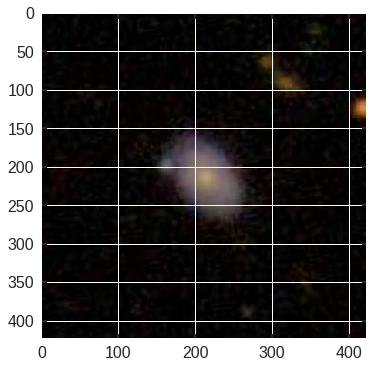

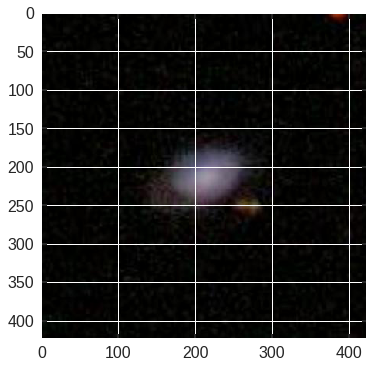

In [13]:
# show images
for i in range(2):
  imshow(alldata.__getitem__(i))

In [0]:
import pandas as pd

In [15]:
train = pd.read_csv('%s/../training_solutions_rev1.csv'%path)
train.shape

(61578, 38)

In [0]:
image_names = os.listdir(path)
ndata = len(image_names)
labels = np.zeros((ndata,3))

for i in range(ndata):
    
    arg_index = np.where(train['GalaxyID'] == int(image_names[i].split('.jpg')[0]))[0][0]
    #print(arg_index)
    class_probs = np.array(train.iloc[[arg_index], 1:4])[0]
    labels[i,np.argmax(class_probs)] = 1

In [0]:
#alldata.image_paths

In [0]:
#image_names

In [0]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [0]:
?nn.Conv2d

In [0]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [22]:
inputs = alldata.__getitem__(i)
inputs

tensor([[[-1.0000, -1.0000, -1.0000,  ..., -0.9294, -0.9294, -0.9294],
         [-1.0000, -1.0000, -1.0000,  ..., -0.9294, -0.9294, -0.9294],
         [-1.0000, -1.0000, -1.0000,  ..., -0.9451, -0.9451, -0.9451],
         ...,
         [-0.9451, -0.9373, -0.9294,  ..., -0.9922, -1.0000, -1.0000],
         [-0.9529, -0.9373, -0.9216,  ..., -0.9922, -1.0000, -1.0000],
         [-0.9529, -0.9373, -0.9216,  ..., -0.9922, -1.0000, -1.0000]],

        [[-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
         [-0.9843, -0.9843, -0.9843,  ..., -0.9922, -0.9922, -0.9922],
         [-0.9843, -0.9843, -0.9843,  ..., -0.9843, -0.9843, -0.9843],
         ...,
         [-0.9451, -0.9373, -0.9294,  ..., -0.9922, -1.0000, -1.0000],
         [-0.9529, -0.9373, -0.9216,  ..., -0.9922, -1.0000, -1.0000],
         [-0.9529, -0.9373, -0.9216,  ..., -0.9922, -1.0000, -1.0000]],

        [[-0.9922, -0.9922, -0.9922,  ..., -1.0000, -1.0000, -1.0000],
         [-0.9922, -0.9922, -0.9922,  ..., -1

In [23]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i in range(ndata):
        # get the inputs
        inputs = alldata.__getitem__(i)

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 2000))
            running_loss = 0.0

print('Finished Training')

RuntimeError: ignored